In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.mnist



In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
callbacks = myCallback()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

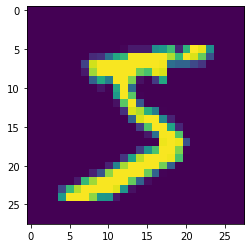

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=200)

i = 0 # image number

plt.imshow(x_train[i])
print(x_train[i])
print(x_train[i].shape)

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2030 - accuracy: 0.9404
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0820 - accuracy: 0.9749
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0530 - accuracy: 0.9834
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0373 - accuracy: 0.9884
Epoch 5/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0277 - accuracy: 0.9906
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0276 - accuracy: 0.9906


0

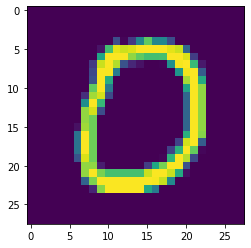

In [ ]:
i = 10 # image number

plt.imshow(x_test[i])

prediction = model.predict(x_test)
np.argmax(prediction[i])